In [7]:
# Import Libraries

import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 
from sklearn.compose import make_column_transformer


# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored


import ipywidgets
from ipywidgets import interact


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 



In [8]:
data = pd.read_csv("./ClothingReviewsData/ClothingReviews.csv",index_col=0)
data.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

#### From the head of the dataset, we see that we have some unnecessary features such as Clothing ID, Title. I will drop these features.

In [9]:
data = data.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
data.head()

Age  \
0   33   
1   34   
2   60   
3   50   
4   47   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND   Division Name Department Name Class Name  
0       4                1       Initmates        Intimate  Intimates  
1       5                1         General         Dresses    Dresses  
2       3                0         General         Dresses    Dresses  
3       5                1  General Petite         Bottoms      Pants  
4       5                1         General            Tops    Blouses

In [10]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

Age                  0
Review Text        845
Rating               0
Recommended IND      0
Division Name       14
Department Name     14
Class Name          14
dtype: int64

#### It is impossible to replace the Review Text features. Therefore, I will drop the missing rows from the dataset.

In [11]:
data = data.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], axis=0)
data = data.reset_index(drop=True)


In [12]:
# Checking for the missing values after the drops
count_NaN_updated = data.isna().sum()
count_NaN_updated

Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

## Exploratory Data Analysis

#### Distribution of the Ratings

In [13]:
fig = px.histogram(data['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=data['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

#### According to the graph above, frequency of the Rating 5 is pretty high compared to the others.

#### Distribution of the Age of the Customers

In [14]:
fig = px.histogram(data['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

#### As you can see from the 'Distribution of the Age of the Customers' graph, the age of the customers is usually distributed between 34 and 52. We have outliers that customers older than 80.

### Distribution of the Recommendations¶

In [15]:
labels = ['Recommended', 'Not Recommended']
values = [data[data['Recommended IND'] == 1]['Recommended IND'].value_counts()[1],
          data[data['Recommended IND'] == 0]['Recommended IND'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### According to this pie chart, the most of the sales are Recommended.

### Distribution of Age and Recommendation

In [16]:
fig = px.histogram(data['Age'], color=data['Recommended IND'],
                   labels={'value': 'Age',
                           'color': 'Recommended'}, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

### Relationship between Ratings and Recommendation

In [17]:
fig = px.histogram(data['Rating'], color=data['Recommended IND'],
                   labels={'value': 'Rating',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

#### According to this graph above, almost all the Rating 5 and Rating 4 data points are recommended.

In addition, Rating 1 and Rating 2 data points have almost no recommendations.

For the further steps, I would create a common rating point with the Rating 4 and Rating 5 as well as Rating 1 and Rating 2. In this way, I would shrink the labels therefore, the model would perform better.

### Relationship between Ratings and Departments

In [18]:
fig = px.histogram(data['Rating'], color=data['Department Name'],
                   labels={'value': 'Rating',
                           'color': 'Department Name'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Departments',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

### According to the graph above, Tops and Dresses have the most of the rating points. Jackets have the least.

### Department and Recommendation Distribution

In [19]:
fig = px.histogram(data['Department Name'], color=data['Recommended IND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

### Division and Recommendation Distribution

In [20]:
fig = px.histogram(data['Division Name'], color=data['Recommended IND'],
                   labels={'value': 'Division Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Division Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

### Distribution of the Length of the Texts

In [21]:
data['length_of_text'] = [len(i.split(' ')) for i in data['Review Text']]
fig = px.histogram(data['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended'},
                   color=data['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

#### As you can see from the figure above, Recommended and not Recommended products almost have the same distribution length of text.

### Top Frequent 200 Words in the Dataset (Before Cleaning)

In [22]:
FreqOfWords = data['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

#### According to this Treemap above, the top frequent 200 words usually include stopwords. For the further step of this notebook, I will remove them from the text.

### Data Preprocessing

#### Cleaning the data 

In [23]:
# Lower Character all the Texts
data['Review Text'] = data['Review Text'].str.lower()
data['Review Text'].head()

0                                                                                                                                                      absolutely wonderful - silky and sexy and comfortable
1    love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...
2    i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
3                                                                               i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
4           this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any card

#### Removing Punctuations

In [25]:
import re
data.loc[:,'Review Text'] = data.loc[:,'Review Text'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
data['Review Text'].head()

0                                                                                                                                                      absolutely wonderful - silky and sexy and comfortable
1    love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me- hi...
2    i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...
3                                                                                        i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments
4                this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any 

### Tokenization with NLTK

In [26]:
def tokenization(inputs):  # Ref.1
    return word_tokenize(inputs)


data['text_tokenized'] = data['Review Text'].apply(tokenization)
data['text_tokenized'].head()

0                                                                                                                                             [absolutely, wonderful, -, silky, and, sexy, and, comfortable]
1    [love, this, dress, its, sooo, pretty, i, happened, to, find, it, in, a, store, and, im, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, its, petite, i, bought, a, petite, and, a...
2    [i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, initially, ordered, the, petite, small, my, usual, size, but, i, found, this, to, be, outrageously, sma...
3                                                                 [i, love, love, love, this, jumpsuit, its, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]
4    [this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pai

##### Tokenizing with NLTK will help me to clean the dataset for better model training.

### Removal of Stopwords

In [27]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'].head()

0                                                                                                                                                       [absolutely, wonderful, -, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, me-, hits, little, knee, would, definitely, true, midi...
2    [high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, not, zip, reordered, petite, medium, ok, overall, top, ha...
3                                                                                                   [love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliments]
4                                                                          [shirt, flattering, due, adjustable, front, tie, perfect, length, wear, leggings, sleeveless, pairs, well

### Lemmatization

In [28]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'].head()

0                                                                                                                                                       [absolutely, wonderful, -, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, store, im, glad, bc, never, would, order, online, bc, petite, buy, petite, 58, love, length, me-, hit, little, knee, would, definitely, true, midi, someon...
2    [high, hop, dress, really, want, work, initially, order, petite, small, usual, size, find, outrageously, small, small, fact, could, not, zip, reorder, petite, medium, ok, overall, top, half, comfo...
3                                                                                                    [love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]
4                                                                              [shirt, flatter, due, adjustable, front, tie, perfect, length, wear, leggings, sleeveless, pair, well

In [29]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]


data['final'] = data['text_lemmatized'].apply(remove_less_than_2)

In [30]:
# Joining Tokens into Sentences
data['final'] = data['final'].str.join(' ')
data['final'].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                                   love dress sooo pretty happen find store glad never would order online petite buy petite love length me- hit little knee would definitely true midi someone truly petite
2    high hop dress really want work initially order petite small usual size find outrageously small small fact could not zip reorder petite medium overall top half comfortable fit nicely bottom half t...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                               shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair 

### Top Frequent 200 Words in the Dataset (After Cleaning)

In [31]:
FreqOfWords = data['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

#### As you can see from the Treemap above, all of the words are unique words and there are no stopwords in this set. Most words are 'dress', 'fit' and 'size'. Since we are dealing with the clothing review dataset, this is pretty reasonable.

### WordCloud of the Recommended Reviews

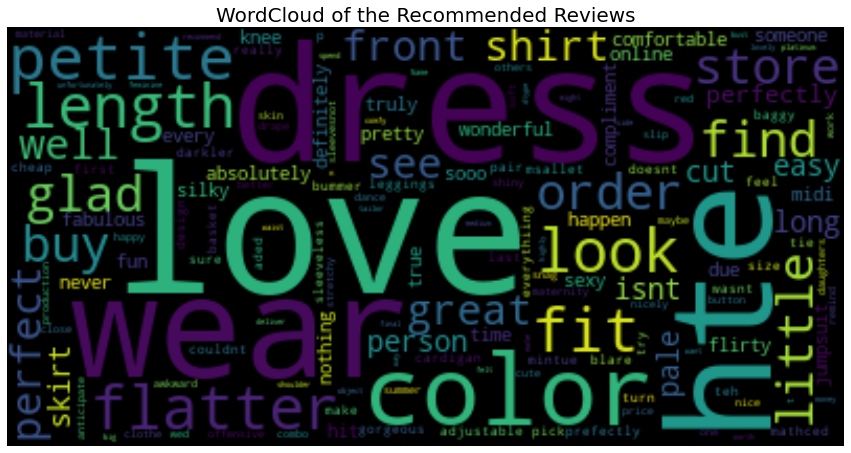

In [32]:
data_recommended = data[data['Recommended IND'] == 1]  # Dataframe that only includes recommended reviews
data_not_recommended = data[data['Recommended IND'] == 0]  # # Dataframe that only includes not recommended reviews

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [33]:
FreqOfWords = data_recommended['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Recommended Reviews',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

### WordCloud of the Not Recommended Reviews

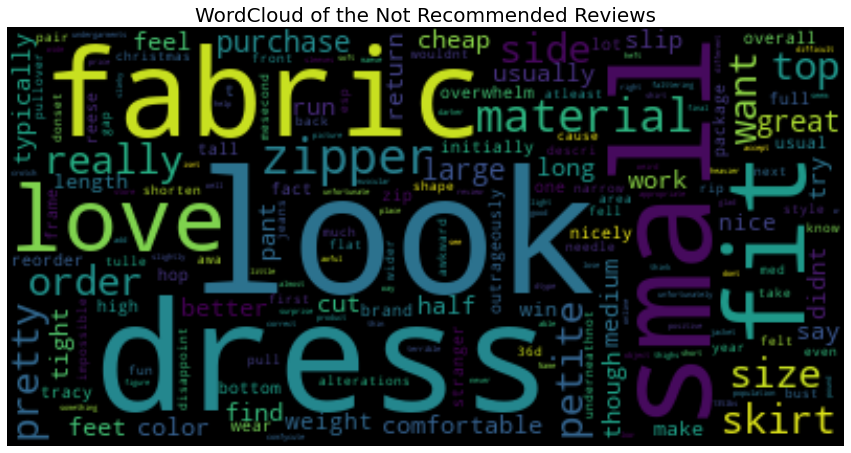

In [34]:
WordCloud_not_recommended = WordCloud(max_words=500,
                                      random_state=30,
                                      collocations=True).generate(str((data_not_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_not_recommended, interpolation='bilinear')
plt.title('WordCloud of the Not Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [35]:
FreqOfWords = data_not_recommended['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Not Recommended Reviews',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

#### Distribution of the Length of the Texts after Cleaning

In [36]:
data['length_of_text'] = [len(i.split(' ')) for i in data['final']]
fig = px.histogram(data['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended?'},
                   color=data['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts after Cleaning',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

In [39]:
data.head()

Age  \
0   33   
1   34   
2   60   
3   50   
4   47   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    absolutely wonderful - silky and sexy and comfortable   
1  love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me- hi...   
2  i had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could ...   
3                                                                                      i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments   
4              this shirt is very flattering to all due to the adjustable front tie it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan love this shirt   

   Rating  Recommended IND   Division Name Department Name Class Name  \
0       4                1       Initmates        Intimate  Intimates   
1       5                1         General         Dresses    Dresses   
2       3                0         General         Dresses    Dresses   
3       5                1  General Petite         Bottoms      Pants   
4       5                1         General            Tops    Blouses   

   length_of_text  \
0               5   
1              28   
2              47   
3              14   
4              16   

                                                                                                                                                                                            text_tokenized  \
0                                                                                                                                           [absolutely, wonderful, -, silky, and, sexy, and, comfortable]   
1  [love, this, dress, its, sooo, pretty, i, happened, to, find, it, in, a, store, and, im, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, its, petite, i, bought, a, petite, and, a...   
2  [i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, i, initially, ordered, the, petite, small, my, usual, size, but, i, found, this, to, be, outrageously, sma...   
3                                                               [i, love, love, love, this, jumpsuit, its, fun, flirty, and, fabulous, every, time, i, wear, it, i, get, nothing, but, great, compliments]   
4  [this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pairs, well, with, any, ...   

                                                                                                                                                                                                 text_stop  \
0                                                                                                                                                     [absolutely, wonderful, -, silky, sexy, comfortable]   
1  [love, dress, sooo, pretty, happened, find, store, im, glad, bc, never, would, ordered, online, bc, petite, bought, petite, 58, love, length, me-, hits, little, knee, would, definitely, true, midi...   
2  [high, hopes, dress, really, wanted, work, initially, ordered, petite, small, usual, size, found, outrageously, small, small, fact, could, not, zip, reordered, petite, medium, ok, overall, top, ha...   
3                                                                             

In [40]:
data.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND', 'Division Name',
       'Department Name', 'Class Name', 'length_of_text', 'text_tokenized',
       'text_stop', 'text_lemmatized', 'final'],
      dtype='object')

In [41]:
df_ml = data.copy()

In [42]:
drop_columns = ['Age', 
                'Review Text', 
                'Rating',
                'Division Name', 
                'Department Name',
                'Class Name',
                'length_of_text',
                'text_tokenized',
                'text_stop', 'text_lemmatized']

In [43]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [44]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recommended IND  22628 non-null  int64 
 1   final            22628 non-null  object
dtypes: int64(1), object(1)
memory usage: 353.7+ KB


In [45]:
df_ml.rename(columns = {'final':'text', 'Recommended IND':'recommend'}, inplace = True)

In [46]:
df_ml.columns

Index(['recommend', 'text'], dtype='object')

### Train - Test Split
To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [47]:
X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

#### In the next step we create a numerical feature vector for each document:

#### Count Vectorization

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [51]:
X_train_count

<18102x14412 sparse matrix of type '<class 'numpy.int64'>'
	with 470387 stored elements in Compressed Sparse Row format>

In [52]:
X_test_count

<4526x14412 sparse matrix of type '<class 'numpy.int64'>'
	with 115546 stored elements in Compressed Sparse Row format>

In [53]:
len(X_train_count.toarray())

18102

In [54]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
len(X_test_count.toarray())

4526

In [56]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

00  000  002first  00p  025  03  04  06  0dd  0i  0loved  0p  0pand  \
0       0    0         0    0    0   0   0   0    0   0       0   0      0   
1       0    0         0    0    0   0   0   0    0   0       0   0      0   
2       0    0         0    0    0   0   0   0    0   0       0   0      0   
3       0    0         0    0    0   0   0   0    0   0       0   0      0   
4       0    0         0    0    0   0   0   0    0   0       0   0      0   
...    ..  ...       ...  ...  ...  ..  ..  ..  ...  ..     ...  ..    ...   
18097   0    0         0    0    0   0   0   0    0   0       0   0      0   
18098   0    0         0    0    0   0   0   0    0   0       0   0      0   
18099   0    0         0    0    0   0   0   0    0   0       0   0      0   
18100   0    0         0    0    0   0   0   0    0   0       0   0      0   
18101   0    0         0    0    0   0   0   0    0   0       0   0      0   

       0petite  0rxxs  0verall  0xs  10  100  1000  100lbs  100s  101  1010  \
0            0      0        0    0   0    0     0       0     0    0     0   
1            0      0        0    0   0    0     0       0     0    0     0   
2            0      0        0    0   0    0     0       0     0    0     0   
3            0      0        0    0   0    0     0       0     0    0     0   
4            0      0        0    0   0    0     0       0     0    0     0   
...        ...    ...      ...  ...  ..  ...   ...     ...   ...  ...   ...   
18097        0      0        0    0   0    0     0       0     0    0     0   
18098        0      0        0    0   0    0     0       0     0    0     0   
18099        0      0        0    0   0    0     0       0     0    0     0   
18100        0      0        0    0   0    0     0       0     0    0     0   
18101        0      0        0    0   0    0     0       0     0    0     0   

       1012  102  102lbs  103  10311  103lb  103lbs  104  104lbs  105  105lbs  \
0         0    0       0    0      0      0       0    0       0    0       0   
1         0    0       0    0      0      0       0    0       0    0       0   
2         0    0       0    0      0      0       0    0       0    0       0   
3         0    0       0    0      0      0       0    0       0    0       0   
4         0    0       0    0      0      0       0    0       0    0       0   
...     ...  ...     ...  ...    ...    ...     ...  ...     ...  ...     ...   
18097     0    0       0    0      0      0       0    0       0    0       0   
18098     0    0       0    0      0      0       0    0       0    0       0   
18099     0    0       0    0      0      0       0    0       0    0       0   
18100     0    0       0    0      0      0       0    0       0    0       0   
18101     0    0       0    0      0      0       0    0       0    0       0   

       105lbs32c  106  106lbs  107  107lb  107lbs  107pound  108  108lbs  109  \
0              0    0       0    0      0       0         0    0       0    0   
1              0    0       0    0      0       0         0    0       0    0   
2              0    0       0    0      0       0         0    0       0    0   
3              0    0       0    0      0       0         0    0       0    0   
4              0    0       0    0      0       0         0    0       0    0   
...          ...  ...     ...  ...    ...     ...       ...  ...     ...  ...   
18097          0    0       0    0      0       0         0    0       0    0   
18098          0    0       0    0      0       0         0    0       0    0   
18099          0    0       0    0      0       0         0    0       0    0   
18100          0    0       0    0      0       0         0    0       0    0   
18101          0    0       0    0      0       0         0    0       0    0   

       109lbs  10i  10kept  10lbs  10m  10m34c  10medium  10mths  10p  10s  \
0           0    0       0      0    0       0         0       0    0    0   
1           0    0 

In [58]:
X_train

array(['skeptical contrast color detail blazer turn right blazer look like part prep school uniform color fit boxy maybe someones style dont think look good',
       'get coat need something black think plaid black not thats fault love anyway perfect temperate seattle fall winter not light not heavy get ton compliment 145 medium fit perfectly',
       'first love top overall simple classic flatter forgive cut agree major design flaw reviewers mention v-neck deep fall low need wear camisole underneath instead choose take stitch neckline keep together want work beautifully think top include either small button snap hold neckline properly stitch together',
       ...,
       'dress lounge dress home even belt nice shoe would make day back way longer front show picture material not substantial lounge dress swimcoverup fine',
       'buy shirt colorful polka dot print obsess like previous review mention run little small chest normally medium 36c order large fit perfect way button space thin

#### TfidVectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [61]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

00   000  002first   00p   025    03    04    06   0dd    0i  0loved  \
0     0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
1     0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
2     0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
3     0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
4     0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
...     ...   ...       ...   ...   ...   ...   ...   ...   ...   ...     ...   
18097 0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
18098 0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
18099 0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
18100 0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   
18101 0.000 0.000     0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   0.000   

         0p  0pand  0petite  0rxxs  0verall   0xs    10   100  1000  100lbs  \
0     0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
1     0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
2     0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
3     0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
4     0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
...     ...    ...      ...    ...      ...   ...   ...   ...   ...     ...   
18097 0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
18098 0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
18099 0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
18100 0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   
18101 0.000  0.000    0.000  0.000    0.000 0.000 0.000 0.000 0.000   0.000   

       100s   101  1010  1012   102  102lbs   103  10311  103lb  103lbs   104  \
0     0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
1     0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
2     0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
3     0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
4     0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
...     ...   ...   ...   ...   ...     ...   ...    ...    ...     ...   ...   
18097 0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
18098 0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
18099 0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
18100 0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   
18101 0.000 0.000 0.000 0.000 0.000   0.000 0.000  0.000  0.000   0.000 0.000   

       104lbs   105  105lbs  105lbs32c   106  106lbs   107  107lb  107lbs  \
0       0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
1       0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
2       0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
3       0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
4       0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
...       ...   ...     ...        ...   ...     ...   ...    ...     ...   
18097   0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
18098   0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
18099   0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
18100   0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   
18101   0.000 0.000   0.000      0.000 0.000   0.000 0.000  0.000   0.000   

       107pound   108  108lbs   109  109lbs   10i  10kept  10lbs   10m  \
0         0.000 0.000   0.000 0.000   0.000 0.000   0.000  0.000 0.000   
1         0.000 0.000   0.000 0.000   0.0

### Modelling with Machine Learning Models

In [63]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [64]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_Count Model
------------------
[[3220  486]
 [ 133  687]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3706
           1       0.59      0.84      0.69       820

    accuracy                           0.86      4526
   macro avg       0.77      0.85      0.80      4526
weighted avg       0.89      0.86      0.87      4526

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14821
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18102
   macro avg       0.81      0.91      0.85     18102
weighted avg       0.92      0.89      0.90     18102



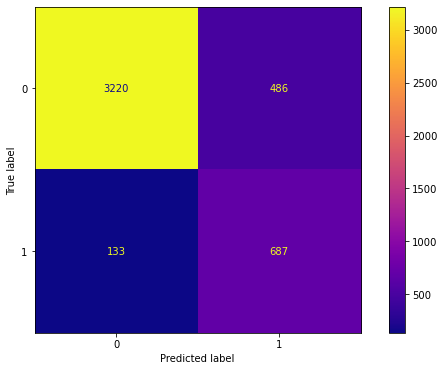

In [66]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [67]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

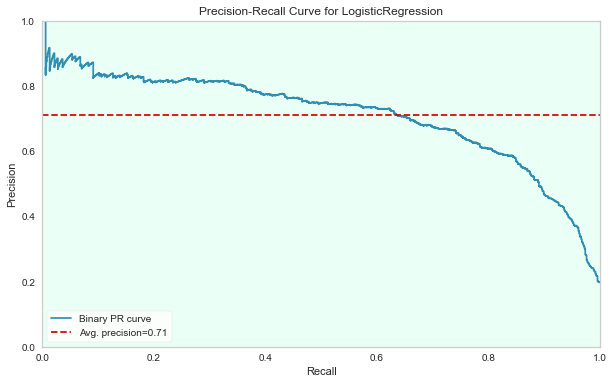

In [68]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      LogisticRegression(C = 0.1, max_iter = 1000, class_weight= "balanced", random_state=101),
      classes = logreg_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [69]:
y_pred = logreg_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [70]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)

viz.score_       :  0.7098384760984227
LogReg_Count_rec :  [0.86886131 0.83780488]
LogReg_Count_f1  :  [0.91231053 0.68941295]
LogReg_Count_AP  :  0.7098384760984227


#### Cross Validation

In [71]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

 accuracy             score for LogReg_Count : 0.8588006687187872

 precision-0          score for LogReg_Count : 0.957089919905924

 recall-0             score for LogReg_Count : 0.8664061341173881

 f1-0                 score for LogReg_Count : 0.9094442375167245

 precision-1          score for LogReg_Count : 0.5781659011067086

 recall-1             score for LogReg_Count : 0.824451404848395

 f1-1                 score for LogReg_Count : 0.6793911620562393



In [72]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

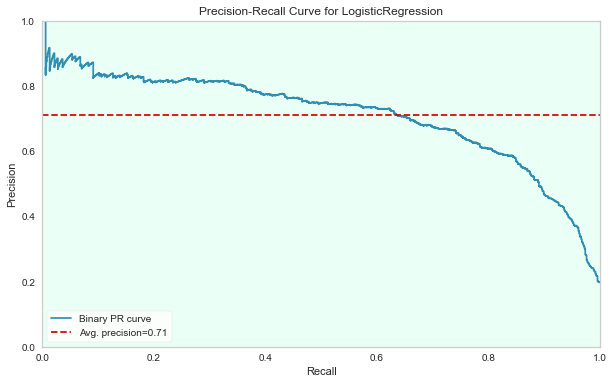

In [73]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [74]:
LogReg_Count_AP = viz.score_
LogReg_Count_AP

0.7098384760984227

### TF-IDF

In [75]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_TFIDF Model
------------------
[[3220  486]
 [ 125  695]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3706
           1       0.59      0.85      0.69       820

    accuracy                           0.87      4526
   macro avg       0.78      0.86      0.80      4526
weighted avg       0.89      0.87      0.87      4526

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14821
           1       0.64      0.94      0.76      3281

    accuracy                           0.89     18102
   macro avg       0.81      0.91      0.85     18102
weighted avg       0.92      0.89      0.90     18102



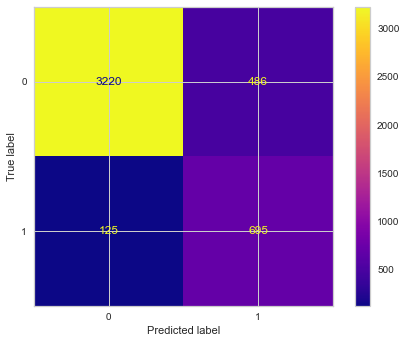

In [76]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

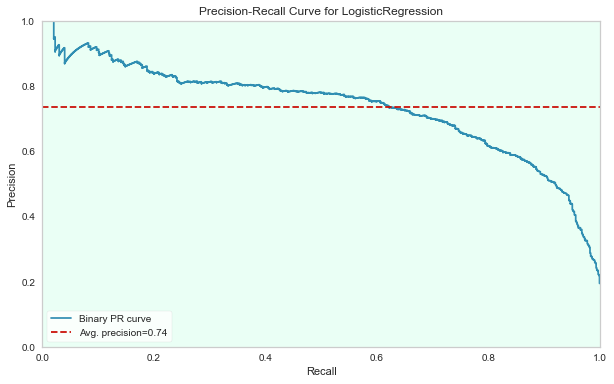

In [77]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state=101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [78]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

#### TF-IDF Cross Validation

In [79]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")

 accuracy             score for LogReg_TFIDF : 0.8379190093687747

 precision-0          score for LogReg_TFIDF : 0.9613770501764634

 recall-0             score for LogReg_TFIDF : 0.8356390418444576

 f1-0                 score for LogReg_TFIDF : 0.8940734816570582

 precision-1          score for LogReg_TFIDF : 0.5335302272955751

 recall-1             score for LogReg_TFIDF : 0.8482254058862777

 f1-1                 score for LogReg_TFIDF : 0.6548926979504689



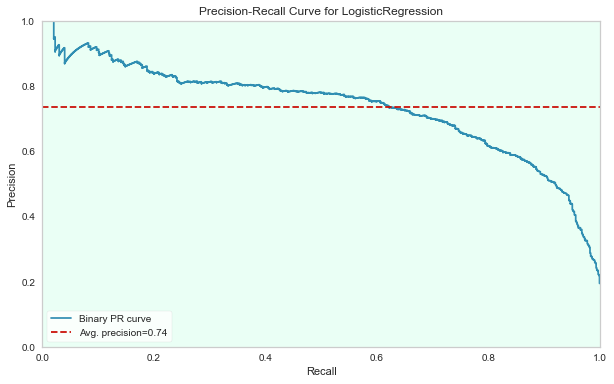

In [80]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced"),
    classes = logreg_tfidf.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
LogReg_TFIDF_AP = viz.score_
LogReg_TFIDF_AP

0.7352051157958099